# Hotel Business Data Analysis Portfolio Project

## 1. Project Overview
This project analyzes hotel booking data to identify **customer behavior trends, seasonal demand, and factors influencing cancellations**. The objective is to derive insights that help **optimize hotel operations and revenue management**.

## 2. Introduction
The hotel industry experiences fluctuations in demand based on factors such as **seasonality, customer demographics, and booking preferences**. Understanding these trends can help hoteliers adjust pricing strategies, manage cancellations, and enhance customer satisfaction. This analysis provides a data-driven approach to optimizing hotel business operations.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** Hotel booking dataset with reservation details.
- **Key Columns:**
  - `Hotel Type` (Resort or City Hotel)
  - `Booking Date` (Date of reservation)
  - `Lead Time` (Days between booking and check-in)
  - `Customer Type` (Transient, Contract, Group, etc.)
  - `Total Nights` (Length of stay)
  - `Meal Plan` (Type of meal service chosen)
  - `Cancellation Status` (Whether the booking was canceled or not)

### 3.2 Data Cleaning Process
- Removed duplicate and erroneous entries.
- Handled missing values in booking attributes.
- Standardized date formats and numerical values.
- Converted categorical variables for consistent analysis.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Booking Trends
- Analyzed booking frequency across different months and seasons.
- Identified peak and low-demand periods for hotels.

### 4.2 Customer Behavior Analysis
- Examined patterns in lead time and length of stay.
- Studied differences in booking behavior for different customer types.

### 4.3 Cancellation Trends
- Investigated factors contributing to booking cancellations.
- Found correlations between cancellation rates and lead time.

### 4.4 Revenue Impact Analysis
- Evaluated the impact of cancellations on hotel revenue.
- Analyzed pricing trends across different booking periods.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.shape

(119390, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [8]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [9]:
df.shape

(119390, 29)

In [10]:
df.duplicated().sum()


33261

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [16]:
df['children'].fillna(0,inplace=True)
df["city"].fillna("Unknown",inplace=True)
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [25]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_weekdays_nights            int64
adults                              int64
children                            int64
babies                              int64
meal                               object
city                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
agent                               int64
company                             int64
days_in_waiting_list              

In [24]:
df["children"]=df["children"].astype(int)
df["agent"]=df["agent"].astype(int)
df["company"]=df["company"].astype(int)

In [38]:
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [40]:
df['meal'].replace("Undefined","No Meal",inplace=True)
df.meal.value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [44]:
df['Total_guests']=df["adults"]+df["children"]+df["babies"]
print("Data with 0 guest: {0} out of {1}".format(df[df["Total_guests"] == 0].shape[0],df.shape[0]))

Data with 0 guest: 165 out of 86129


In [45]:
df['stay_duration']=df["stays_in_weekend_nights"]+df["stays_in_weekdays_nights"]
print("Data with 0 night: {0} out of {1}".format(df[df["stay_duration"] == 0].shape[0],df.shape[0]))

Data with 0 night: 645 out of 86129


In [47]:
df_clean=df[(df["Total_guests"] != 0) & (df["stay_duration"] != 0)].copy()
print("Before pre processing : {0}".format(df.shape[0]))
print("After Pre processing : {0}".format(df_clean.shape[0]))


Before pre processing : 86129
After Pre processing : 85378


In [48]:
df_clean

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.00,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,0,Personal,107.00,0,0,Check-Out,2,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,303,0,0,Personal,103.00,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394,0,0,Personal,96.14,0,0,Check-Out,2,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9,0,0,Personal,225.43,0,2,Check-Out,3,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9,0,0,Personal,157.71,0,4,Check-Out,2,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89,0,0,Personal,104.40,0,0,Check-Out,2,7


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

In [50]:
df2=df_clean.copy()

In [6]:
df2_gb=df2.groupby(['hotel',"arrival_date_month"])["arrival_date_year"].agg(['nunique',"count"]).reset_index()
df2_gb.columns=["Hotel","Month",'Unique_year','No of bookings']
df2_gb

,Hotel,Month,Unique_year,No of bookings
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2952
4,City Hotel,January,2,2849
5,City Hotel,July,2,5321
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4040


In [7]:
df2_gb['Average booking']=round(df2_gb['No of bookings']/df2_gb['Unique_year'])
df2_gb

,Hotel,Month,Unique_year,No of bookings,Average booking
0,City Hotel,April,2,3514,1757.0
1,City Hotel,August,2,4908,2454.0
2,City Hotel,December,2,4009,2004.0
3,City Hotel,February,2,2952,1476.0
4,City Hotel,January,2,2849,1424.0
5,City Hotel,July,2,5321,2660.0
6,City Hotel,June,2,5017,2508.0
7,City Hotel,March,2,2674,1337.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4040,2020.0


In [8]:
ordered_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [9]:
ordered_months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [10]:
df2_gb['Mon']=df2_gb['Month'].str[:3]
df2_gb['Mon']=pd.Categorical(values=df2_gb['Mon'],categories=ordered_months,ordered=True)

In [11]:
df2_gb.dtypes

Hotel                object
Month                object
Unique_year           int64
No of bookings        int64
Average booking     float64
Mon                category
dtype: object

In [ ]:
df2.to_csv('HBA Final')

In [2]:
df=pd.read_csv('HBA Final')


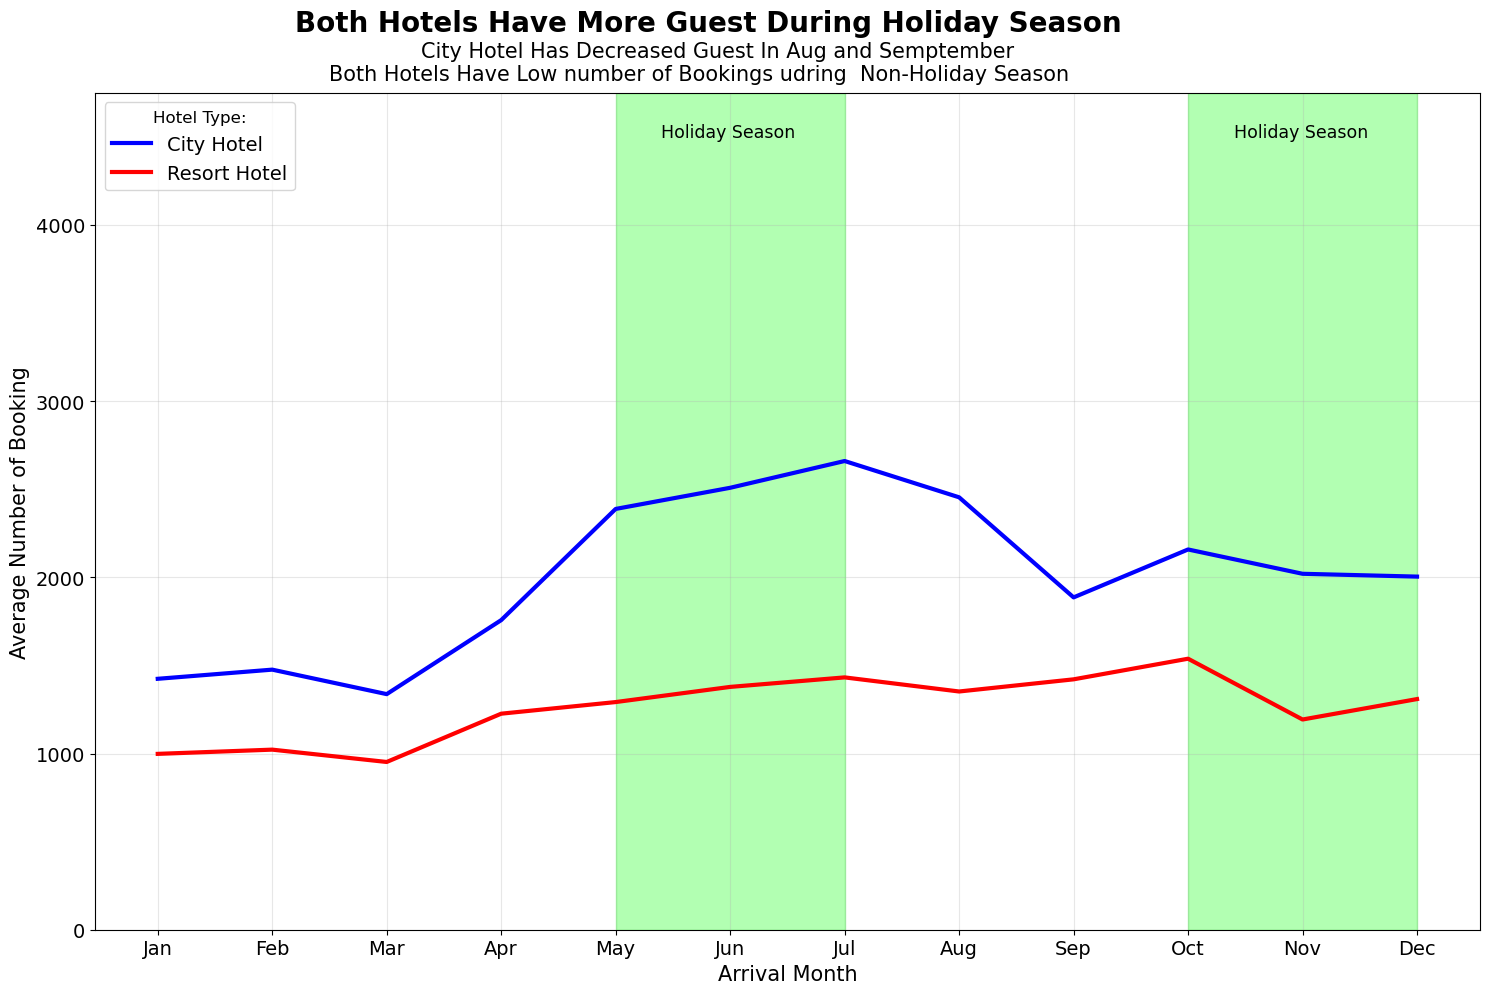

In [12]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Mon",y='Average booking',data=df2_gb,hue='Hotel',size='Hotel',sizes=(3,3),palette=['blue','red'])
plt.tick_params(axis='both',which='major',labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type:',title_fontsize ="large",prop= {'size':14})
plt.xlabel(xlabel='Arrival Month',fontsize=15)
plt.ylabel(ylabel='Average Number of Booking',fontsize=15)
plt.ylim(0,4750)
plt.text(x=1.2,y=5100,s="Both Hotels Have More Guest During Holiday Season",fontsize=20,fontweight='bold')
plt.text(x=2.3,y=4950,s="City Hotel Has Decreased Guest In Aug and Semptember ",fontsize=15)
plt.text(x=1.5,y=4820,s="Both Hotels Have Low number of Bookings udring  Non-Holiday Season",fontsize=15)
plt.axvspan(xmin=4,xmax=6,color='lime',alpha=0.3)
plt.axvspan(xmin=9,xmax=11,color='lime',alpha=0.3)
plt.text(x=4.40,y=4500,s='Holiday Season',fontsize=12.5)
plt.text(x=9.40,y=4500,s='Holiday Season',fontsize=12.5)
plt.tight_layout()

In [ ]:
#plt.axvline(4, ls='--', color='green')
#plt.axvline(6, ls='--', color='green')
#plt.stackplot(np.arange(4,7,1),[[4800]], color='lime', alpha=0.3)
#plt.text(x=4.7, y=4400, s='Holiday\nSeason', fontsize=16, color='green')
#plt.axvline(9, ls='--', color='green')
#plt.axvline(11, ls='--', color='green')
#plt.stackplot(np.arange(9,12,1),[[4800]], color='lime', alpha=0.3)

In [13]:
df3=df2.copy()

In [14]:
df3.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_guests,stay_duration
0,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
1,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
2,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
3,6,Resort Hotel,0,0,2017,September,27,1,0,2,...,0,0,0,Personal,107.0,0,0,Check-Out,2,2
4,7,Resort Hotel,0,9,2017,September,27,1,0,2,...,303,0,0,Personal,103.0,0,1,Check-Out,2,2


<Axes: xlabel='stay_duration', ylabel='Count'>

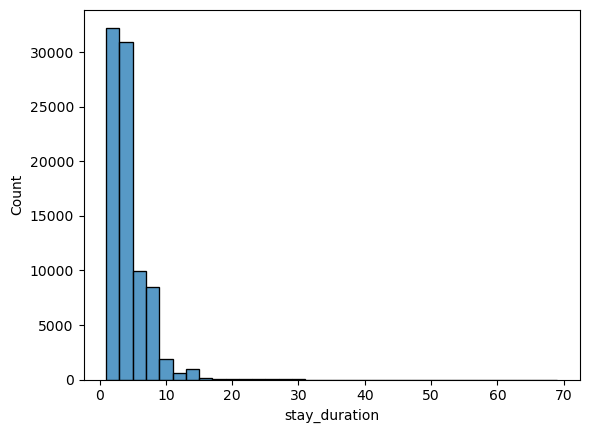

In [53]:
sns.histplot(data=df3,x='stay_duration',binwidth=2)

<Axes: xlabel='is_canceled', ylabel='stay_duration'>

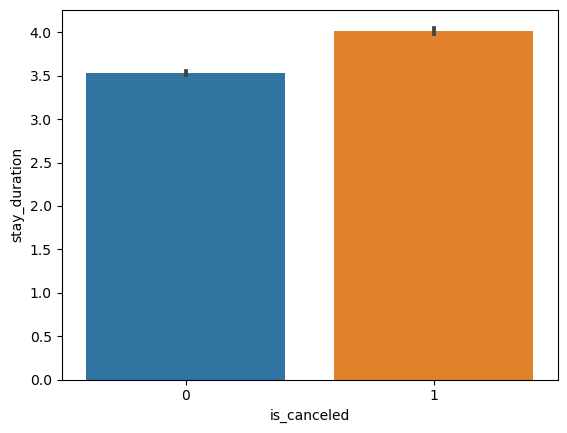

In [52]:
sns.barplot(data=df3,x='is_canceled',y='stay_duration')

In [30]:
df3['total nights']=(np.where(df3['stay_duration']>21,21,np.where(df3['stay_duration'] > 14,15,df3['stay_duration'])))

In [33]:
df3['total nights'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 13, 12, 21])

In [55]:
df3_gb=df3.groupby(['hotel','is_canceled','total nights'])['arrival_date_month'].count().reset_index()
df3_gb

,hotel,is_canceled,total nights,arrival_date_month
0,City Hotel,0,1,7841
1,City Hotel,0,2,7374
2,City Hotel,0,3,9136
3,City Hotel,0,4,6440
4,City Hotel,0,5,2887
...,...,...,...,...
59,Resort Hotel,1,12,49
60,Resort Hotel,1,13,24
61,Resort Hotel,1,14,159
62,Resort Hotel,1,15,47


In [64]:
df3_pivot=df3_gb.pivot_table(index=['hotel','total nights'],columns=['is_canceled'],values=['arrival_date_month']).reset_index()
df3_pivot.columns=['Hotel','Total Nights','Not Cancelled','Cancelled']

In [66]:
df3_pivot.head()

,Hotel,Total Nights,Not Cancelled,Cancelled
0,City Hotel,1,7841,2259
1,City Hotel,2,7374,3133
2,City Hotel,3,9136,4182
3,City Hotel,4,6440,3059
4,City Hotel,5,2887,1257


In [77]:
df3_pivot['% Cancelled']=round((df3_pivot['Cancelled']/(df3_pivot['Cancelled']+df3_pivot['Not Cancelled'])*100),2)

In [78]:
df3_pivot

,Hotel,Total Nights,Not Cancelled,Cancelled,% Cancelled
0,City Hotel,1,7841,2259,22.37
1,City Hotel,2,7374,3133,29.82
2,City Hotel,3,9136,4182,31.40
3,City Hotel,4,6440,3059,32.20
4,City Hotel,5,2887,1257,30.33
5,City Hotel,6,1022,610,37.38
6,City Hotel,7,1145,692,37.67
7,City Hotel,8,195,166,45.98
8,City Hotel,9,111,87,43.94
9,City Hotel,10,78,110,58.51


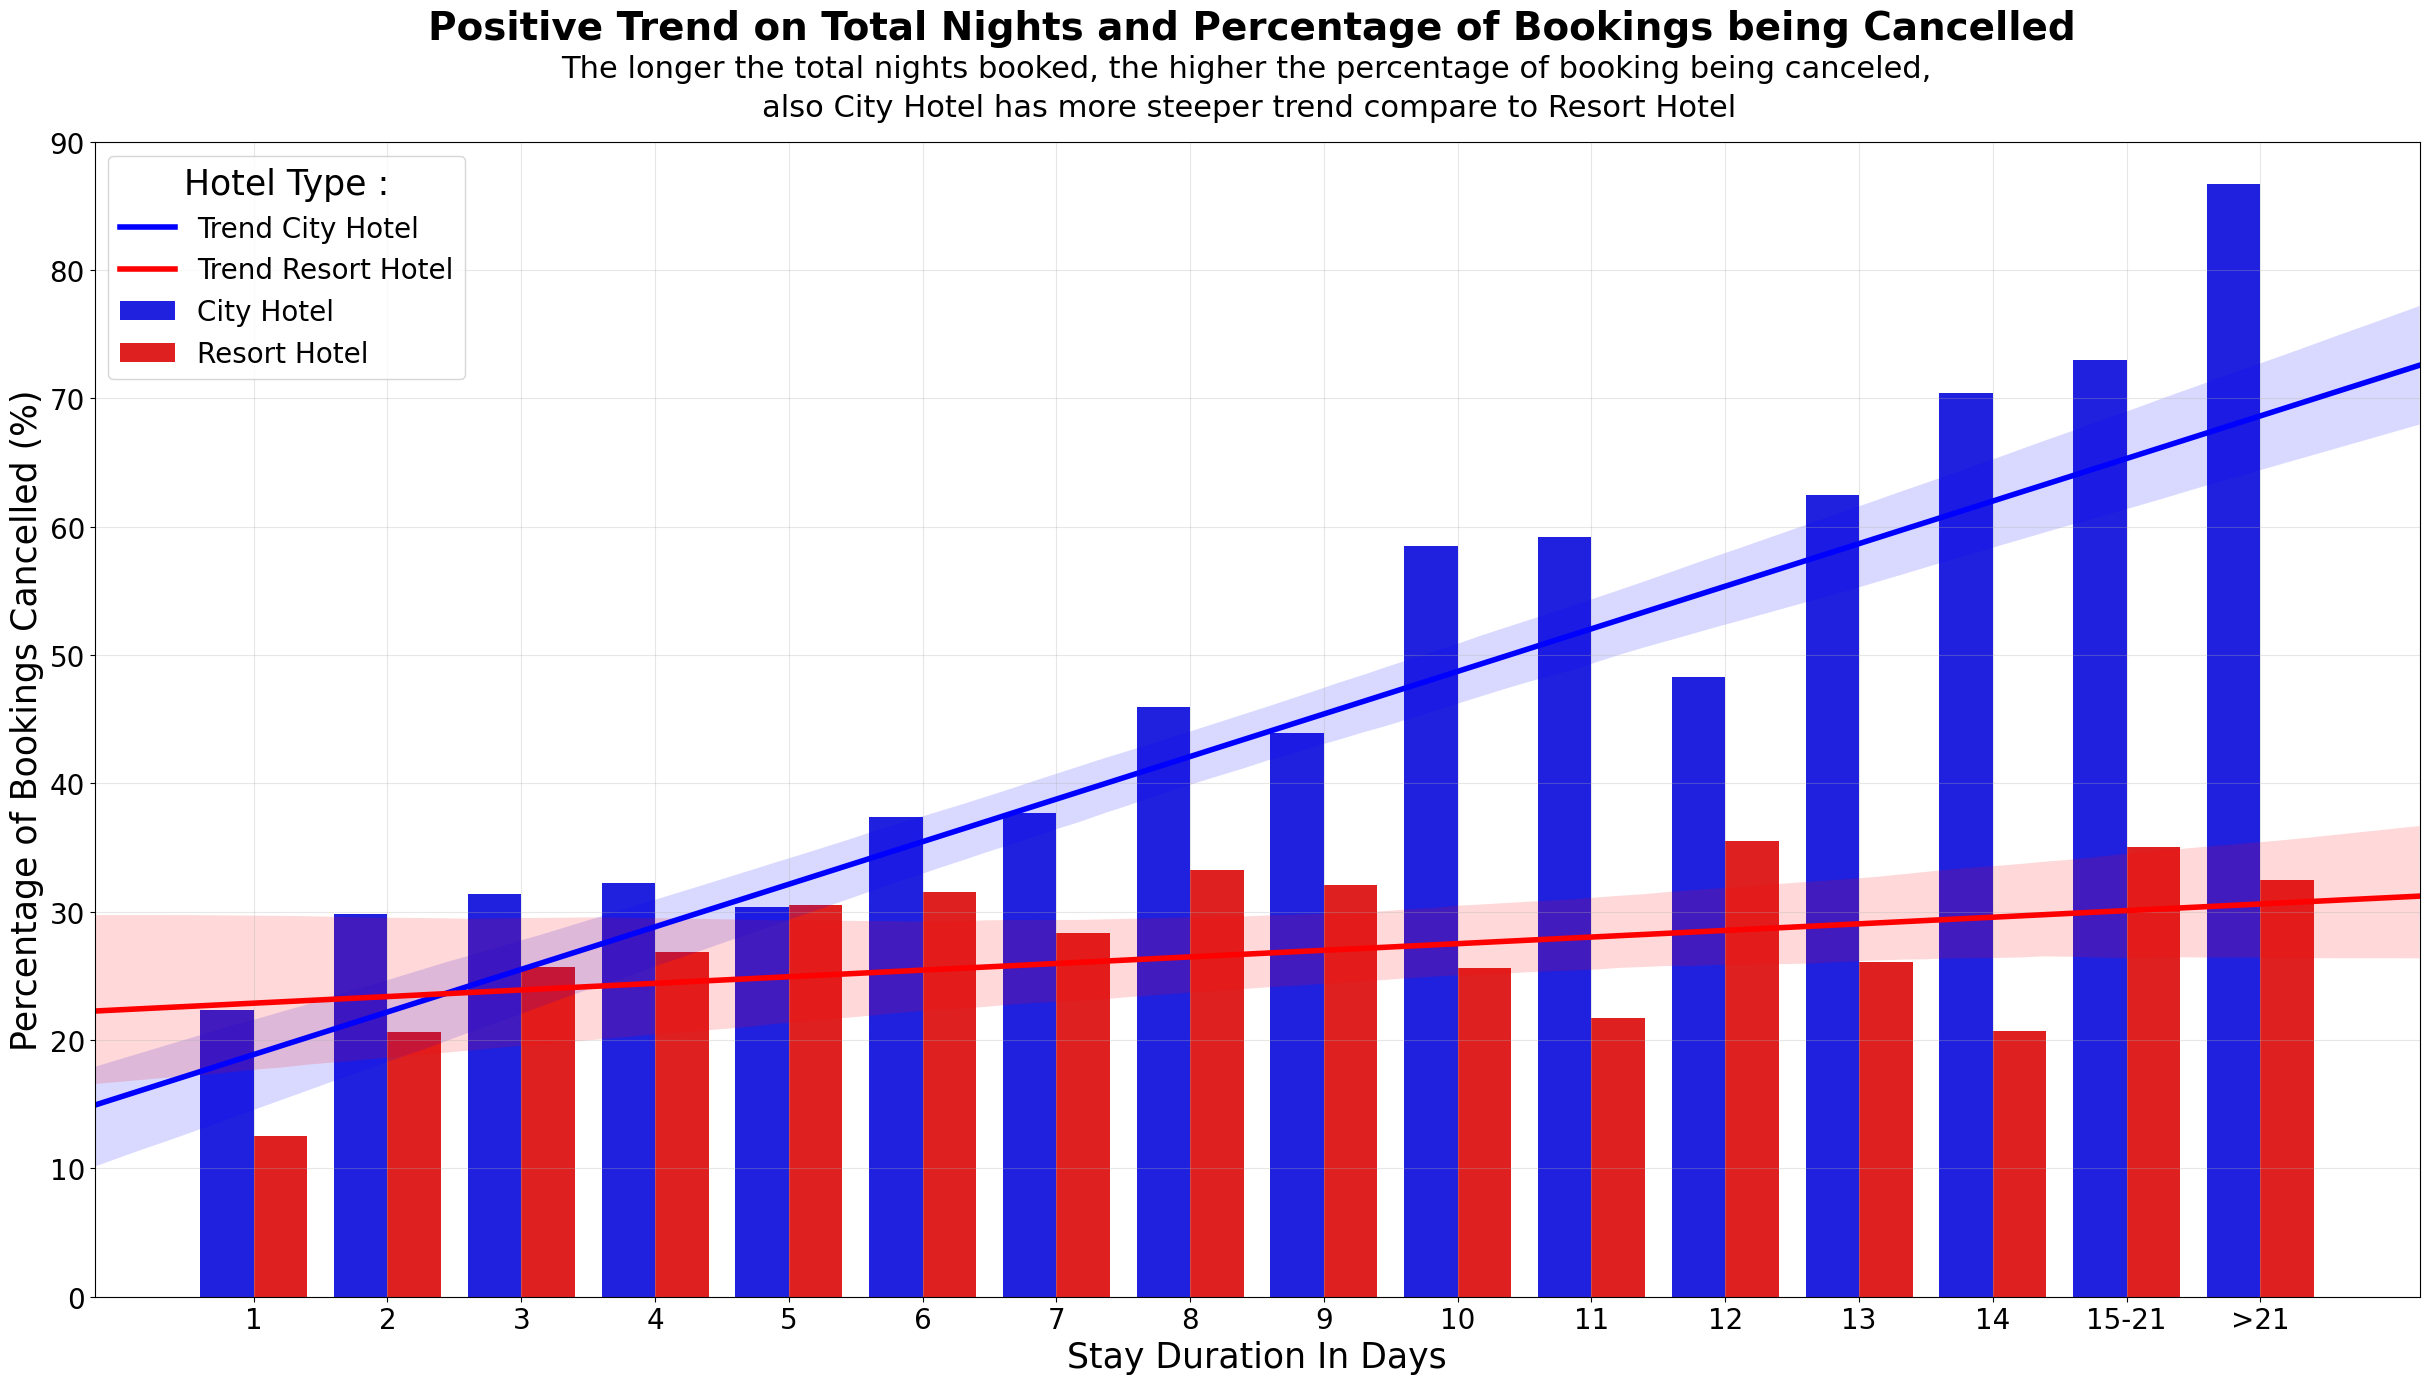

In [163]:
plt.figure(figsize=(30,15))
sns.barplot(data=df3_pivot,x='Total Nights',y='% Cancelled',hue='Hotel',palette=['blue','red'])
sns.regplot(data=df3_pivot[df3_pivot['Hotel'] == 'City Hotel'],x='Total Nights',y='% Cancelled',scatter=False,truncate=False,label='Trend City Hotel',line_kws={'linewidth':4,'color':'blue'})
sns.regplot(data=df3_pivot[df3_pivot['Hotel'] == 'Resort Hotel'],x='Total Nights',y='% Cancelled',scatter=False,truncate=False,label='Trend Resort Hotel',line_kws={'linewidth':4,'color':'red'})
plt.tick_params(axis='both',which='major',labelsize=14)
plt.grid(alpha=0.3)
plt.ylim(0,90)
plt.legend(fontsize=20,title='Hotel Type :',title_fontsize=25)
plt.xticks(range(0,16),labels=[x for x in range(1,15)]+['15-21','>21'],fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Percentage of Bookings Cancelled (%)',fontsize=25)
plt.xlabel('Stay Duration In Days',fontsize=25)
plt.text(x=1.3,y=98,s='Positive Trend on Total Nights and Percentage of Bookings being Cancelled',fontweight='bold',fontsize=28)
plt.text(x=2.3, y=95, s='The longer the total nights booked, the higher the percentage of booking being canceled,',fontsize=22)
plt.text(x=3.8, y=92, s='also City Hotel has more steeper trend compare to Resort Hotel', fontsize=22)
plt.show()


In [3]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_guests,stay_duration
0,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
1,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
2,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
3,6,Resort Hotel,0,0,2017,September,27,1,0,2,...,0,0,0,Personal,107.0,0,0,Check-Out,2,2
4,7,Resort Hotel,0,9,2017,September,27,1,0,2,...,303,0,0,Personal,103.0,0,1,Check-Out,2,2


In [4]:
df1=df.copy()

In [5]:
df1.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'Total_guests', 'stay_duration'],
      dtype='object')

<Axes: xlabel='lead_time', ylabel='Count'>

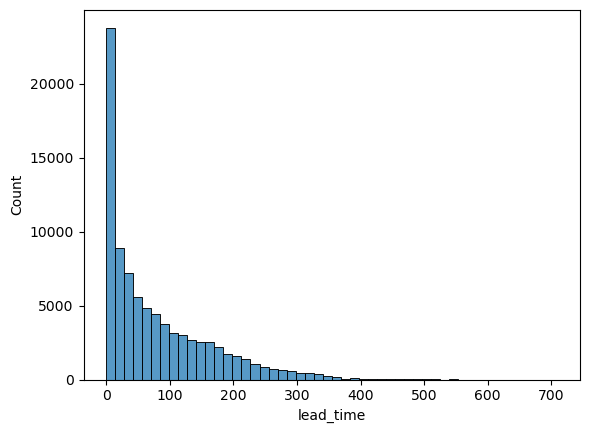

In [11]:
sns.histplot(data=df1['lead_time'],bins=50)

In [12]:
df1['lead_time'].max()

709

In [13]:
df1['lead_time']=np.where(df1['lead_time']>400,401,df1['lead_time'])

In [14]:
df1['lead_time'].max()

401

In [18]:
bins=np.arange(0,max(df1['lead_time'])+30,30)

In [19]:
bins

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
       390, 420])

In [38]:
labels=["{0}-{1}".format(bins[x],bins[x+1]) for x in range(len(bins[:-1]))]

In [40]:
labels

['0-30',
 '30-60',
 '60-90',
 '90-120',
 '120-150',
 '150-180',
 '180-210',
 '210-240',
 '240-270',
 '270-300',
 '300-330',
 '330-360',
 '360-390',
 '390-420']

In [43]:
df1['lead time group']=pd.cut(df['lead_time'],bins=bins,labels=labels,include_lowest=True)

In [44]:
df1.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_guests,stay_duration,lead time group
0,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,0-30
1,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,0-30
2,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,0-30
3,6,Resort Hotel,0,0,2017,September,27,1,0,2,...,0,0,Personal,107.0,0,0,Check-Out,2,2,0-30
4,7,Resort Hotel,0,9,2017,September,27,1,0,2,...,0,0,Personal,103.0,0,1,Check-Out,2,2,0-30


In [53]:
df1_gb=df1.groupby(['hotel','lead time group','is_canceled'])['lead_time'].agg('count').reset_index()

In [ ]:
#df1.groupby(['hotel','lead time group','is_canceled']).agg({'lead_time':"count"}).reset_index()
#df1.groupby(['hotel','lead time group','is_canceled']).count().reset_index()

In [63]:
df1_pivot=df1_gb.pivot_table(index=['hotel','lead time group'],columns='is_canceled',values='lead_time').reset_index()
df1_pivot.columns=['Hotel','Lead Time Group','Not cancelled','Cancelled']
df1_pivot

,Hotel,Lead Time Group,Not cancelled,Cancelled
0,City Hotel,0-30,16024,3927
1,City Hotel,30-60,5818,2884
2,City Hotel,60-90,4069,2088
3,City Hotel,90-120,3031,1684
4,City Hotel,120-150,2288,1312
5,City Hotel,150-180,1851,1170
6,City Hotel,180-210,1263,837
7,City Hotel,210-240,815,568
8,City Hotel,240-270,439,414
9,City Hotel,270-300,307,327


In [69]:
df1_pivot['% cancelled']=round(df1_pivot['Cancelled']/(df1_pivot['Cancelled']+df1_pivot['Not cancelled'])*100,2)

In [72]:
df1_pivot.head()

,Hotel,Lead Time Group,Not cancelled,Cancelled,% cancelled
0,City Hotel,0-30,16024,3927,19.68
1,City Hotel,30-60,5818,2884,33.14
2,City Hotel,60-90,4069,2088,33.91
3,City Hotel,90-120,3031,1684,35.72
4,City Hotel,120-150,2288,1312,36.44


Text(3, 83, 'Reservations With High lead Time tends to Get Cancelled')

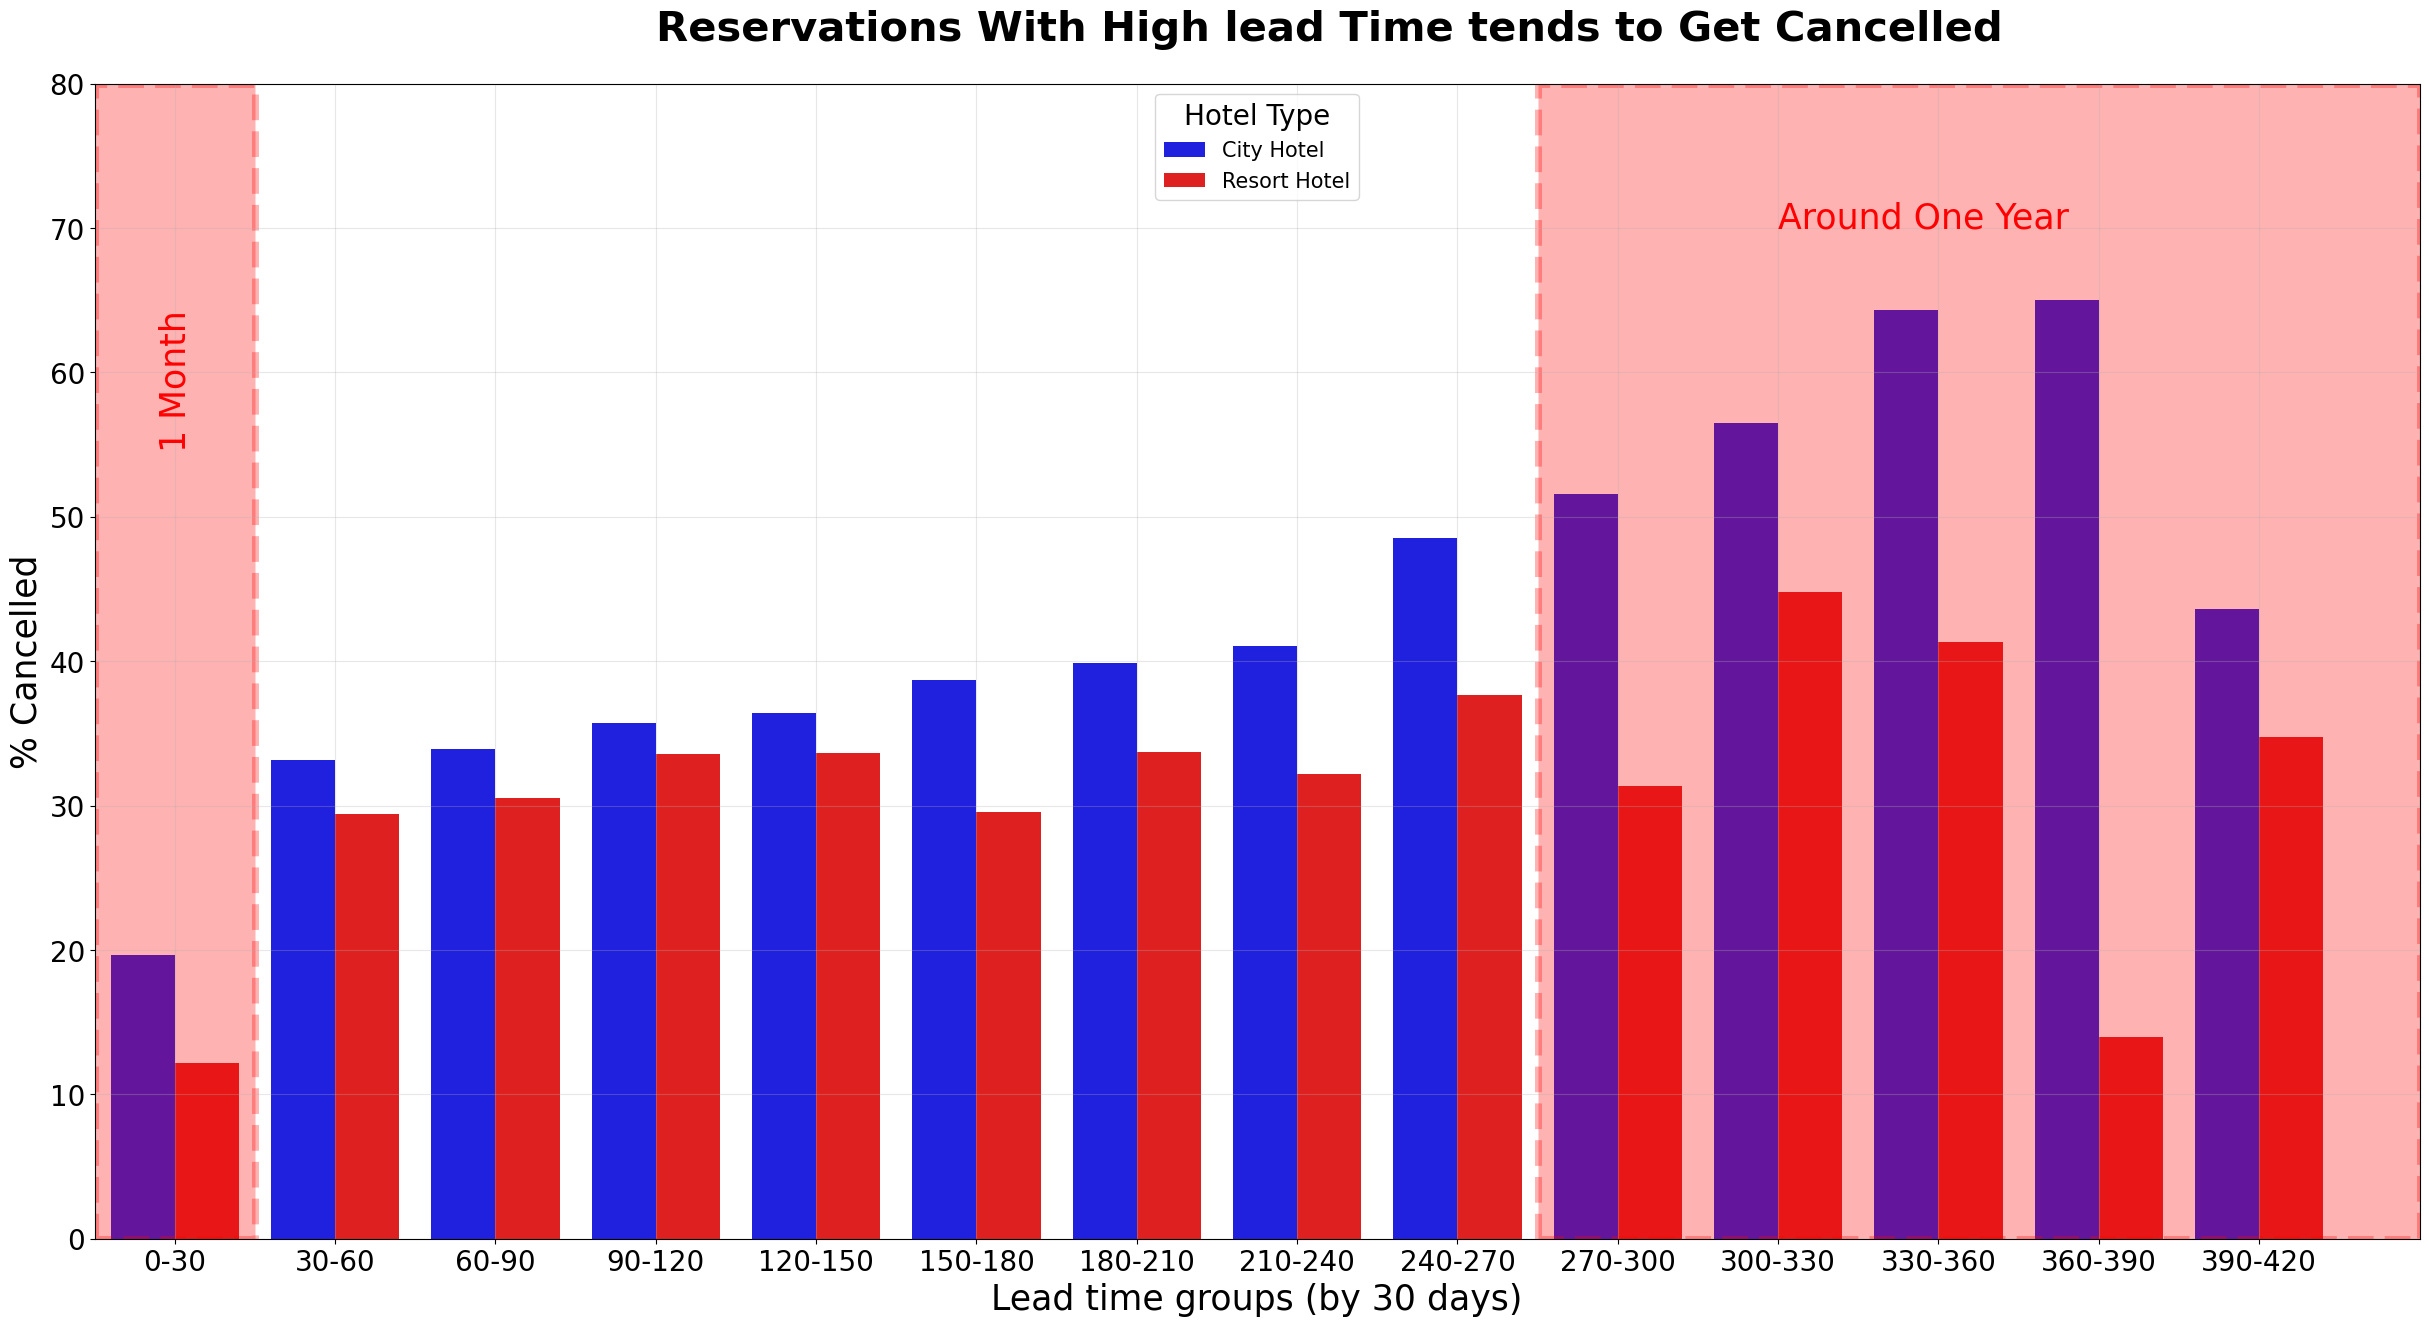

In [113]:
plt.figure(figsize=(30,15))
sns.barplot(x='Lead Time Group',y='% cancelled',data=df1_pivot,hue='Hotel',palette=['blue','red'])
plt.legend(title='Hotel Type',title_fontsize=20,prop={'size':15},loc='upper center')
plt.tick_params(axis='both',which='major',labelsize=20)
plt.ylabel(ylabel='% Cancelled',fontsize=25)
plt.xlabel(xlabel='Lead time groups (by 30 days)',fontsize=25)
plt.grid(alpha=0.3)
plt.xlim(-0.5,14)
plt.ylim(0,80)
plt.axvspan(xmin=-0.5,xmax=0.5,ls='--',lw=5,ec='red',color='red',alpha=0.3)
plt.axvspan(xmin=8.5,xmax=14,ls='--',lw=5,ec='red',color='red',alpha=0.3)
plt.text(x=-0.1,y=55,s='1 Month',rotation=90,color='red',fontsize=25)
plt.text(x=10,y=70,s='Around One Year',color='red',fontsize=25)
plt.text(x=3,y=83,s='Reservations With High lead Time tends to Get Cancelled',color='black',fontsize=30,fontweight='bold')

# 5. Key Findings
### 5.1 Insights Gathered
- **High seasonality in hotel bookings**, with peak demand during holidays and vacation periods.
- **Longer lead times often lead to higher cancellation rates**, especially for transient bookings.
- **Resort hotels experience more seasonal fluctuations** compared to city hotels.
- **Meal plan selection impacts total spending**, with customers opting for full board plans staying longer.

### 5.2 Future Recommendations
- Implement **dynamic pricing strategies** to optimize revenue during peak and off-peak seasons.
- Introduce **flexible cancellation policies** to reduce last-minute cancellations.
- Use **predictive models** to forecast demand and adjust staffing and inventory accordingly.

## 6. Conclusion
This analysis provides **valuable insights into hotel booking trends, customer behavior, and revenue optimization strategies**. By leveraging these findings, hotel managers can enhance **operational efficiency, reduce cancellations, and maximize revenue**. Future research could integrate **external factors such as competitor pricing, economic conditions, and travel trends** for deeper insights into the hotel industry.

